In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [11]:
print("train_images shape:", train_images.shape, "test_images shape:", test_images.shape)

train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

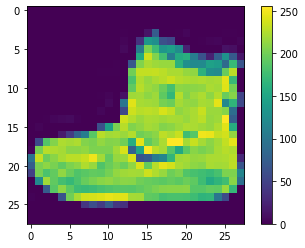

In [20]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

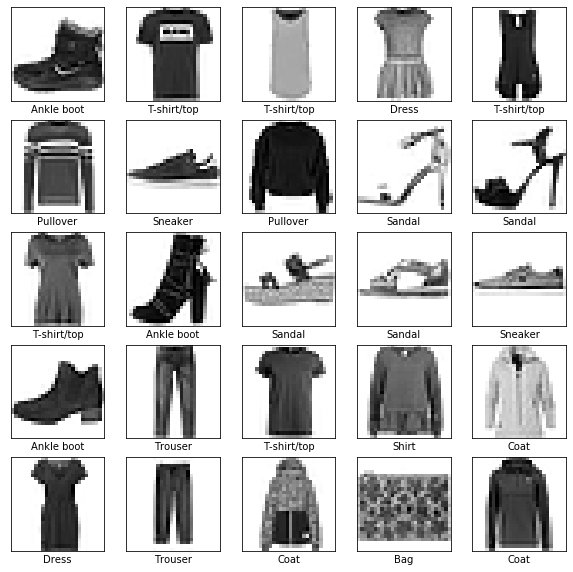

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4963 - acc: 0.8251
Epoch 2/15
60000/60000 [==============================] - 12s 197us/sample - loss: 0.3718 - acc: 0.8654
Epoch 3/15
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3332 - acc: 0.8796
Epoch 4/15
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3093 - acc: 0.8871
Epoch 5/15
60000/60000 [==============================] - 11s 187us/sample - loss: 0.2928 - acc: 0.8913
Epoch 6/15
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2793 - acc: 0.8968
Epoch 7/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2680 - acc: 0.9011
Epoch 8/15
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2557 - acc: 0.9044
Epoch 9/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2462 - acc: 0.9091
Epoch 10/15
60000/60000 [==============================] - 9s 15

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.3368 - acc: 0.8916

Test accuracy: 0.8916


In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([4.9787880e-09, 1.7610464e-13, 1.6368544e-10, 7.6007594e-12,
       4.6315585e-14, 3.6922371e-05, 4.1984288e-11, 2.4483094e-03,
       4.3615267e-09, 9.9751472e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [32]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

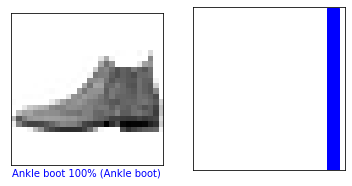

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

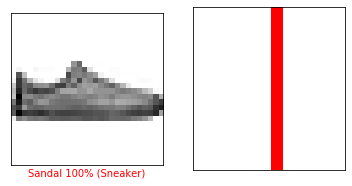

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

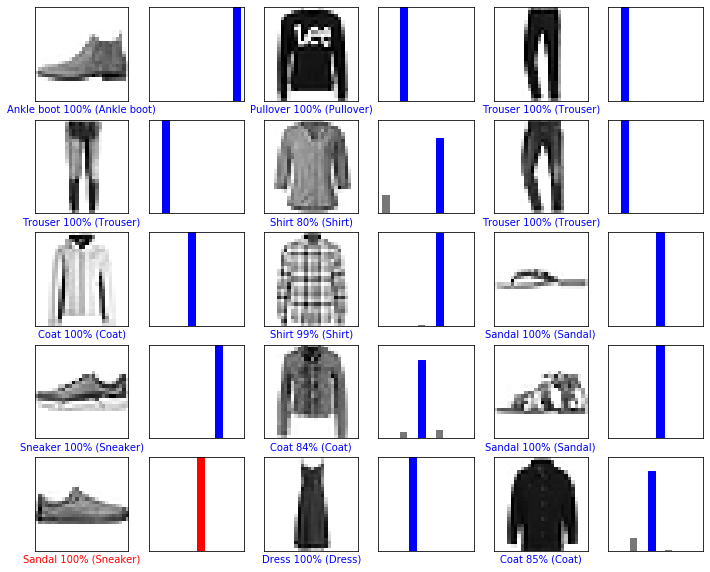

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [37]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.9787880e-09 1.7610432e-13 1.6368544e-10 7.6007881e-12 4.6315585e-14
  3.6922371e-05 4.1984208e-11 2.4483060e-03 4.3615187e-09 9.9751472e-01]]


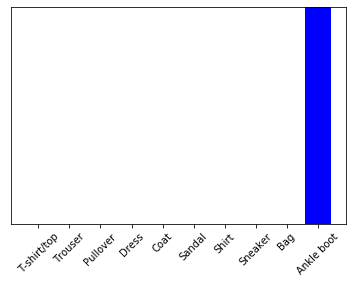

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9